In [4]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [5]:
# Load dataset
df = pd.read_csv("data.csv")
print("Initial Dataset:")
print(df.head())

Initial Dataset:
   index                      title    genre  \
0      0          Drowned Wednesday  fantasy   
1      1              The Lost Hero  fantasy   
2      2  The Eyes of the Overworld  fantasy   
3      3            Magic's Promise  fantasy   
4      4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  


In [6]:
# Drop the 'index' column
df = df.drop(columns=['index'])
print("\nAfter Dropping 'index' Column:")
print(df.head())


After Dropping 'index' Column:
                       title    genre  \
0          Drowned Wednesday  fantasy   
1              The Lost Hero  fantasy   
2  The Eyes of the Overworld  fantasy   
3            Magic's Promise  fantasy   
4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  


In [7]:

# Convert 'genre' to categorical values and create numeric labels
df['genre'] = df['genre'].astype('category')
df['genre_label'] = df['genre'].cat.codes
genre_mapping = dict(enumerate(df['genre'].cat.categories))
print("\nGenre to Label Mapping:")
print(genre_mapping)


Genre to Label Mapping:
{0: 'crime', 1: 'fantasy', 2: 'history', 3: 'horror', 4: 'psychology', 5: 'romance', 6: 'science', 7: 'sports', 8: 'thriller', 9: 'travel'}


In [8]:
# Text Preprocessing
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = nltk.stem.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords])
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:

df['summary'] = df['summary'].apply(preprocess_text)
print("""\nAfter Text Preprocessing (stopwords, punctuation, URLs and lemmatization are removed):
      example: "This is a great movie about a young hero's adventure! Visit http://example.com for more info."
      becomes: "great movie young hero adventure" \n""")  
print(df.head())


After Text Preprocessing (stopwords, punctuation, URLs and lemmatization are removed):
      example: "This is a great movie about a young hero's adventure! Visit http://example.com for more info."
      becomes: "great movie young hero adventure" 

                       title    genre  \
0          Drowned Wednesday  fantasy   
1              The Lost Hero  fantasy   
2  The Eyes of the Overworld  fantasy   
3            Magic's Promise  fantasy   
4             Taran Wanderer  fantasy   

                                             summary  genre_label  
0  drowned wednesday first trustee among morrow d...            1  
1  book open jason awakens school bus unable reme...            1  
2  cugel easily persuaded merchant fianosther att...            1  
3  book open heraldmage vanyel returning country ...            1  
4  taran gurgi returned caer dallben following ev...            1  


C:\Users\dharm\AppData\Local\Temp\ipykernel_26796\1735209446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['genre'].value_counts().index, y=df['genre'].value_counts().values, palette="viridis")


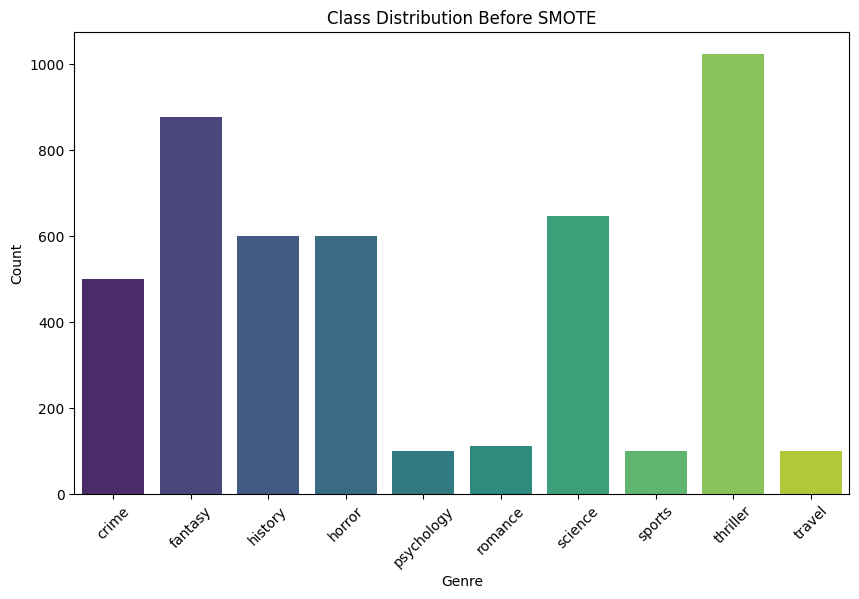

In [10]:
# Class Distribution Before SMOTE
plt.figure(figsize=(10, 6))
sns.barplot(x=df['genre'].value_counts().index, y=df['genre'].value_counts().values, palette="viridis")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

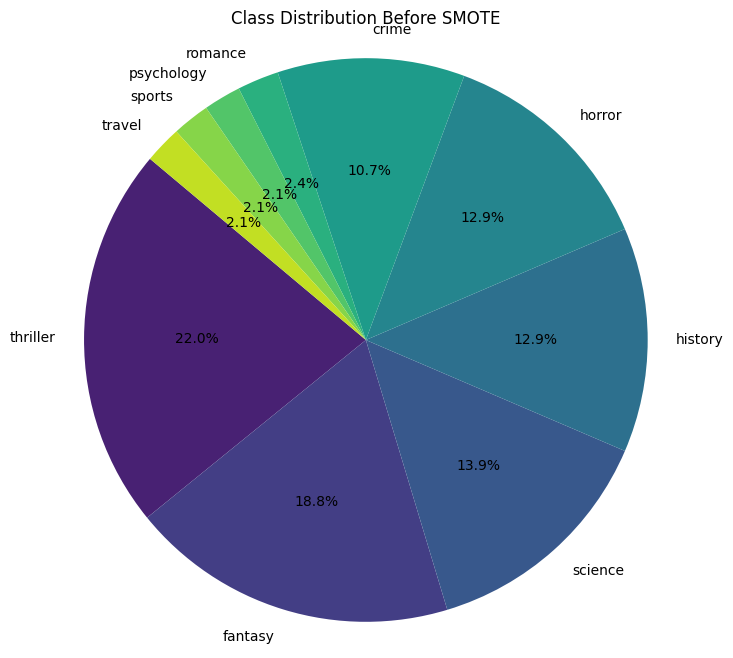

In [11]:
plt.figure(figsize=(8, 8))
genre_counts_before = df['genre'].value_counts()
plt.pie(
    genre_counts_before,
    labels=genre_counts_before.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("viridis", len(genre_counts_before))
)
plt.title('Class Distribution Before SMOTE')
plt.axis('equal')
plt.show()


In [12]:
# Vectorization using TF-IDF with bigrams
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2)) #bigrams
X = tfidf.fit_transform(df['summary'])
y = df['genre_label']

In [13]:
# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

C:\Users\dharm\AppData\Local\Temp\ipykernel_26796\37996715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(y_resampled).value_counts().index, y=pd.Series(y_resampled).value_counts().values, palette="viridis")


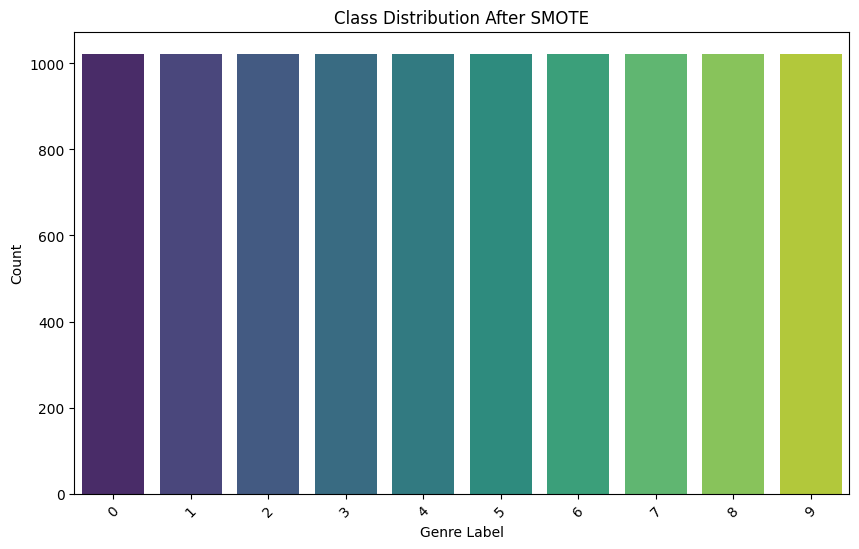

In [14]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.barplot(x=pd.Series(y_resampled).value_counts().index, y=pd.Series(y_resampled).value_counts().values, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Genre Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

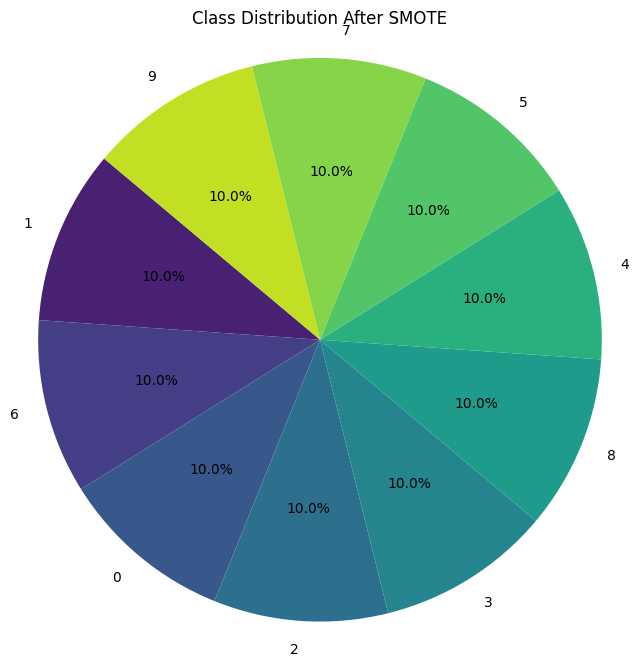

In [15]:
# Pie chart after SMOTE
plt.figure(figsize=(8, 8))
genre_counts_after = pd.Series(y_resampled).value_counts()
plt.pie(
    genre_counts_after,
    labels=genre_counts_after.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("viridis", len(genre_counts_after))
)
plt.title('Class Distribution After SMOTE')
plt.axis('equal')
plt.show()

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
# Define classifiers
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
# Adjust Random Forest and Gradient Boosting parameters
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1) #n_jobs=-1 for parallel processing cpu power.
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)


In [18]:
# Ensemble Model: Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

In [19]:
# Evaluate the model before SMOTE
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, random_state=42)
ensemble_model.fit(X_train_original, y_train_original)
y_pred_original = ensemble_model.predict(X_test_original)
report_original = classification_report(y_test_original, y_pred_original, output_dict=True)

In [20]:
# Evaluate the model after SMOTE
ensemble_model.fit(X_train, y_train)
y_pred_resampled = ensemble_model.predict(X_test)
report_resampled = classification_report(y_test, y_pred_resampled, output_dict=True)

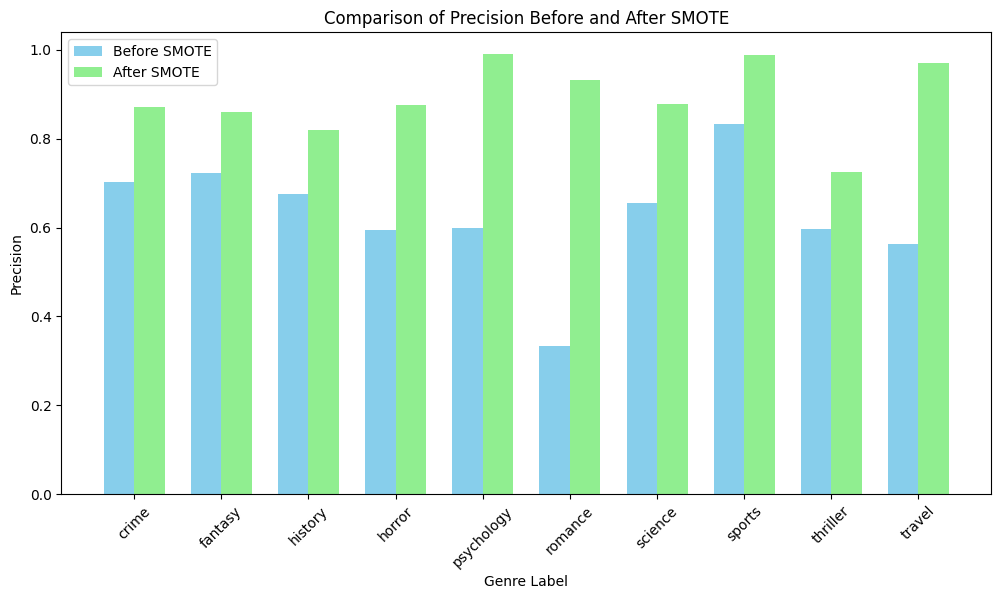

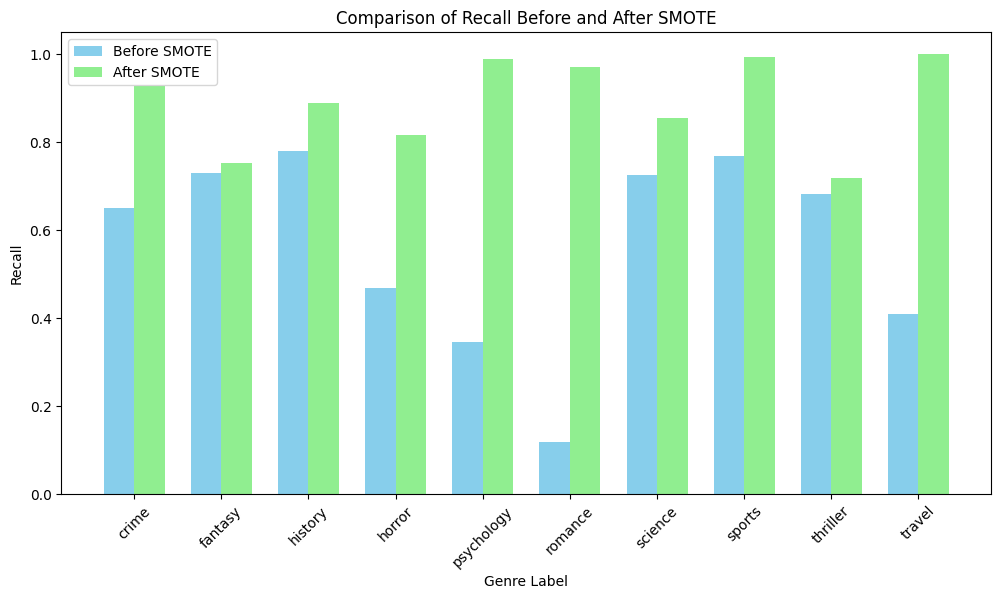

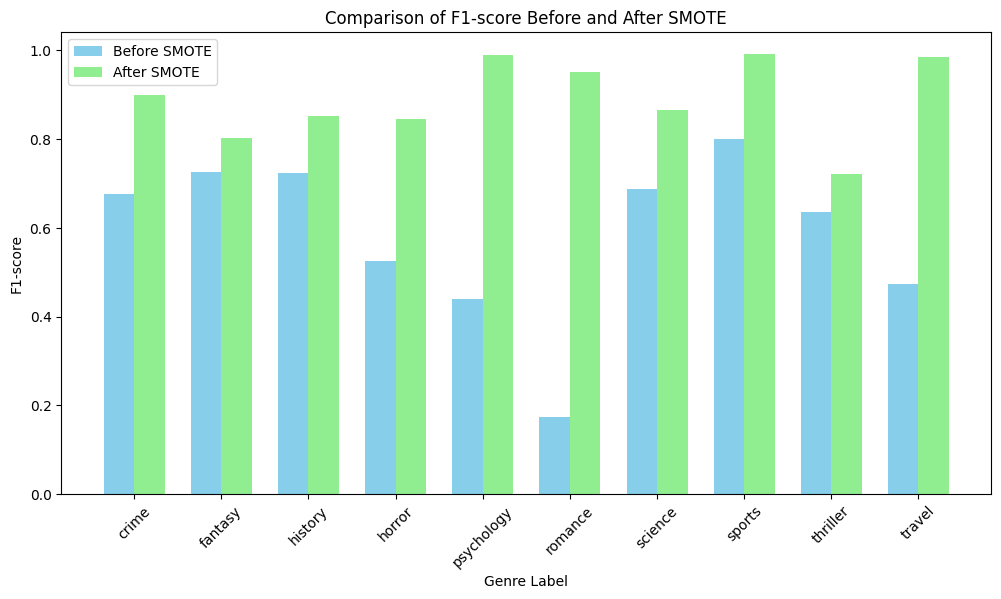

In [21]:
metrics = ['precision', 'recall', 'f1-score']
labels = list(genre_mapping.values())

for metric in metrics:
    before = [report_original[str(i)][metric] for i in range(len(labels))]
    after = [report_resampled[str(i)][metric] for i in range(len(labels))]

    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = np.arange(len(labels))

    plt.bar(index, before, bar_width, label='Before SMOTE', color='skyblue')
    plt.bar(index + bar_width, after, bar_width, label='After SMOTE', color='lightgreen')

    plt.xlabel('Genre Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'Comparison of {metric.capitalize()} Before and After SMOTE')
    plt.xticks(index + bar_width / 2, labels, rotation=45)
    plt.legend()
    plt.show()

In [22]:
# Display classification reports
print("Classification Report Before SMOTE:")
print(classification_report(y_test_original, y_pred_original))

print("\nClassification Report After SMOTE:")
print(classification_report(y_test, y_pred_resampled))

Classification Report Before SMOTE:
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       109
           1       0.72      0.73      0.73       196
           2       0.68      0.78      0.72       118
           3       0.60      0.47      0.52       113
           4       0.60      0.35      0.44        26
           5       0.33      0.12      0.17        17
           6       0.65      0.72      0.69       120
           7       0.83      0.77      0.80        13
           8       0.60      0.68      0.64       198
           9       0.56      0.41      0.47        22

    accuracy                           0.66       932
   macro avg       0.63      0.57      0.59       932
weighted avg       0.65      0.66      0.65       932


Classification Report After SMOTE:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       211
           1       0.86      0.75      0.80       211
      

In [30]:
# List of user input stories
user_inputs = [
    "In a distant kingdom, a young warrior discovers a hidden map leading to an ancient treasure guarded by a fierce dragon. With courage and a magical sword, the warrior sets out on an epic quest, facing mythical creatures and dark sorcery along the way.",
    "In the year 2150, Earth’s last colony on Mars faces a mysterious energy surge that disrupts all communication. A group of astronauts must travel beyond the known galaxy to uncover the source of the anomaly, encountering advanced alien technology that challenges the laws of physics.",
    "In a small coastal town, a writer meets an artist at a local gallery. Despite their differences, the two quickly form a deep bond, sharing dreams and exploring the hidden beauty of the seaside. As the seasons change, their relationship blossoms into a timeless love story.",
    "Detective Harris receives a call about a missing person who disappeared without a trace from a locked room. As she delves deeper into the case, she uncovers a web of lies and a secret that ties the victim to a powerful criminal organization. The closer she gets to the truth, the more dangerous it becomes."
]

# Function to preprocess user input
def preprocess_user_input(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords])
    return text

# Loop through each story, preprocess, vectorize, and predict the genre
for i, user_input in enumerate(user_inputs):
    # Preprocess the input text
    processed_input = preprocess_user_input(user_input)

    # Vectorize the input text using the fitted TF-IDF vectorizer
    input_vector = tfidf.transform([processed_input])

    # Predict the genre label using the trained ensemble model
    predicted_label = ensemble_model.predict(input_vector)[0]

    # Map the predicted label back to the genre name
    predicted_genre = genre_mapping[predicted_label]

    # Display the predicted genre
    print(f"\nStory {i + 1}:")
    print(f"Original Story: {user_input}")
    print(f"Processed Story: {processed_input}")
    print(f"Predicted Genre: {predicted_genre}")



Story 1:
Original Story: In a distant kingdom, a young warrior discovers a hidden map leading to an ancient treasure guarded by a fierce dragon. With courage and a magical sword, the warrior sets out on an epic quest, facing mythical creatures and dark sorcery along the way.
Processed Story: distant kingdom young warrior discovers hidden map leading ancient treasure guarded fierce dragon courage magical sword warrior set epic quest facing mythical creature dark sorcery along way
Predicted Genre: fantasy

Story 2:
Original Story: In the year 2150, Earth’s last colony on Mars faces a mysterious energy surge that disrupts all communication. A group of astronauts must travel beyond the known galaxy to uncover the source of the anomaly, encountering advanced alien technology that challenges the laws of physics.
Processed Story: year 2150 earth last colony mar face mysterious energy surge disrupts communication group astronaut must travel beyond known galaxy uncover source anomaly encounter

In [34]:
# Function to preprocess user input
def preprocess_user_input(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords])
    return text

# Take user input for a new story
user_input = input("Enter a new story or summary to predict its genre: ")

# Preprocess the input text
processed_input = preprocess_user_input(user_input)

# Vectorize the input text using the fitted TF-IDF vectorizer
input_vector = tfidf.transform([processed_input])

# Predict the genre label using the trained ensemble model
predicted_label = ensemble_model.predict(input_vector)[0]

# Map the predicted label back to the genre name
predicted_genre = genre_mapping[predicted_label]

# Display the predicted genre
print(f"\nOriginal Story: {user_input}")
print(f"Processed Story: {processed_input}")
print(f"The predicted genre for the given story is: {predicted_genre}")


Original Story: the neculear bomb was made using the theories of physics. Its one of the biggest fear for all of human kind
Processed Story: neculear bomb made using theory physic one biggest fear human kind
The predicted genre for the given story is: science
